### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

$\gamma$ is called reward discout coefficient，and  $\gamma\in (0,1)$ .As the name suggests, the reward need to decrease as step goes on.

There are two main reason for why we need $\gamma$:

1: If the agent encounters a extreme case in which it take an action $a_1$ for state $s_1$ and return to state $s_1$ rather than reach $s_2$. In this extreme case, the agent cannot reach the terminated state, and the total rewards would be infinity. So when we take $\gamma^n$ into the reward function, the reward would be smaller and smaller as step goes on.

2: People prefer short-term rewards, so we need to give a discount for long-term rewards.

2. Please breifly explain what is value function and what is Q function ?

If we are given the transaction probability and reward function, we can use Bellman Equation to find the way to achieve the max reward.

There are two functions in Bellman Equation: value function and Q function.

Value function is the  expected value of rewards of a certain state after  a series of actions. We use expected value because the action, which the agent to take after a certain state ,**is uncertain or is a probability distribution**.

Q function is similar to value function, but there is a difference that in Q function, the action after a state is certain, such as the agent goes left.

3. How temperal difference related to dynamic programming and monte-carlo methods ?

Temperal difference combines the dynamic programming and monte-carlo methods to solve the RL problem.

Temperal difference would firstly use monte-carlo methods to sample several steps rather than sample until the end, then to use the V value of next step, which is calculated by dynamic programming , to do iteration.

Compared to dynamic programming, temperal difference don't need to know the transaction probability.

Compared to monte-carlo methods, temperal difference could be faster in calculation speed.

4. Please briefly describe what are value iteration and policy iteration ?

There are two functions in Bellman Equation: Value function and Q function. Then, how to find the solution in practice using Bellman Equation? We can use Dynamic Programming.

Value iteration, which corresponds to value function, would randomly initialize a V value for every state so that we can get the transaction probability. Then, we iteratively update the V value until the difference between two V value is less than a threshold.

Policy iteration, which corresponds to Q function, would randomly give a policy or an action, then to calculate the V value. Then, we iteratively update the policy until the difference between two policies is less than a threshold.

5. How can we use deep lerning in reinforcement learning ?

We can regard deep neural network as a function, to which if we input a state,it would return V value or Q value of every actions.

So, the input of the deep Q-network is a state, the output is the Q value of every actions, or probability of actions though softmax.

Then we can use gradient ascent to maximing reward function.

### 选做题 （实践）

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [10]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

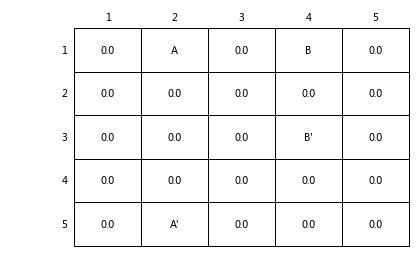

In [12]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. 

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

WORLD_SIZE = 5

A_POS = [0,1]
A_PRIME_POS = [4,1]
B_POS = [0,3]
B_PRIME_POS = [2,3]
DISCOUNT = 0.9

ACTIONS = [np.array([0,-1]),
           np.array([-1,0]),
           np.array([0,1]),
           np.array([1,0])]
ACTION_PROB = 0.25

def step(state,action):
    if state == A_POS:
        return A_PRIME_POS,10
    if state == B_POS:
        return B_PRIME_POS,5
    next_state = (np.array(state)+action).tolist()
    x,y = next_state
    if x < 0 or x >= WORLD_SIZE or \
            y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

In [2]:
def results():
    value= np.zeros((WORLD_SIZE,WORLD_SIZE))
    while True:
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    (next_i,next_J),reward = step([i,j],action)
                    new_value[i,j] += ACTION_PROB*(reward+DISCOUNT*value[next_i,next_J])

        if np.sum(np.abs(value-new_value)) < 1e-4:
            draw_image(np.round(new_value,decimals=2))
            plt.show()
            break
        value = new_value

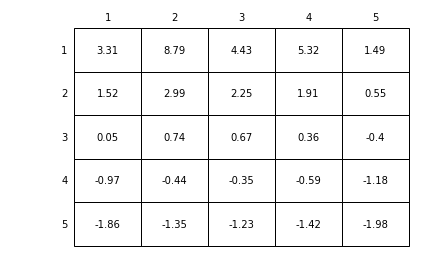

In [3]:
results()